## Predicting Breast Cancer using LogisticRegression, DecisionTree, RandomForest, SpaceVectorMachine and KNearestNeighbor Classifiers

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler

## Reading the dataset

In [3]:
#Reading dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(df.shape)
print(len(df))
print(len(df.columns))

(569, 33)
569
33


## Columns/Variables in the dataset

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

The above dataset has 33 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The column 32(Unnamed:32) has all NULL values and can be removed

In [15]:
df.rename({"Unnamed: 32":"a"}, axis="columns", inplace=True)
df.drop(["a"], axis=1, inplace=True)
df.head(3)

KeyError: "['a'] not found in axis"

Target variable diagnosis is a categorial variable M: Malignant, B: Benign. It is changed to M:1, B:0

In [5]:
df['diagnosis'] = df['diagnosis'].apply(lambda x : '1' if x == 'M' else '0')
df = df.set_index('id')
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


After removing Unnamed:32 column and makind id column as an index label the dataset has 31 columns/variables(including target variable)

In [ ]:
print(len(df.columns))

31


## Number of benign and malignant observations

Number of Benign patients 357
Number of Malignant patients 212


<Axes: xlabel='count', ylabel='diagnosis'>

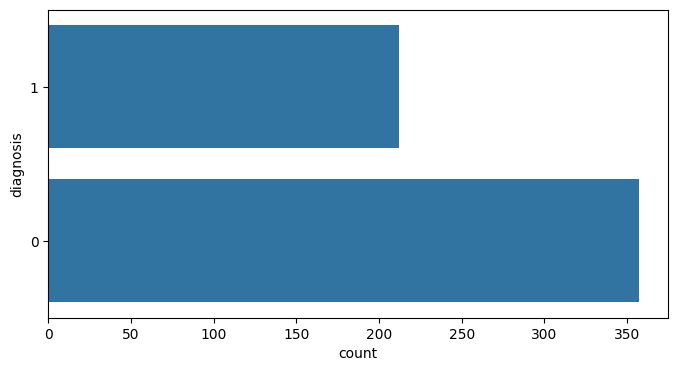

In [16]:
# Number of Benign and Malignant observations
benign,malignant = df['diagnosis'].value_counts()
print("Number of Benign patients", benign)
print("Number of Malignant patients", malignant)

plt.figure(figsize = (8,4))
sns.countplot(df['diagnosis'])


## Target and Feature variables

In [17]:
y = df['diagnosis'].values # Target variable
X = df.drop('diagnosis', axis =1).values # Feature variables

## Spliting data into train and test sets

In [18]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


## Data Normalization

In [19]:
# Normalization
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

## Logistic Regression

In [21]:
#Model building
model1 = LogisticRegression(max_iter=1000)

#Tuning parameters
parameters = {'C':[0.001,0.01, 0.1, 0.2,0.3, 1,10,100,200]}
grid_search = GridSearchCV(model1, parameters, cv = 10) # 10 Fold Cross Validation

# Model fitting
grid_search.fit(X_train_sc, y_train)


print("Best Score is ", grid_search.best_score_)
print("Best Estimator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)


Best Score is  0.9758454106280194
Best Estimator is  LogisticRegression(C=0.3, max_iter=1000)
Best Parametes are {'C': 0.3}


In [22]:
#After hyperparameter tuning
model1 = LogisticRegression(C = 0.3)
model1.fit(X_train_sc, y_train)
y_pred_lr = model1.predict(X_test_sc)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print("Accuracy on Test Data:",accuracy_lr)


Accuracy on Test Data: 0.9824561403508771


Classification report

In [23]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.96      0.98        48

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Confusion matrix

In [24]:
confusion_matrix(y_test,y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,66,0
Malignant,2,46


## DecisionTreeClassifier

In [ ]:
#model building
model = DecisionTreeClassifier()

# Tunning Paramaters
parameters = {'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
              'max_features': ['auto', 'sqrt', 'log2']}


# GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=10) # For 10 Cross-Validation

grid_search.fit(X_train_sc, y_train) # Model Fitting
print("Best Score is ", grid_search.best_score_)
print("Best Estinator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)


Best Score is  0.9428985507246377
Best Estinator is  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Parametes are {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 7}


In [ ]:
#After hyperparameter tuning
model = DecisionTreeClassifier(max_features = 'auto', min_samples_leaf=5, min_samples_split=7)
model.fit(X_train_sc, y_train)
y_pred_dt = model.predict(X_test_sc)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print("Accuracy on Test Data:",accuracy_dt)


Accuracy on Test Data: 0.9473684210526315


Classification report

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       0.98      0.90      0.93        48

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



Confusion matrix

In [ ]:
confusion_matrix(y_test,y_pred_dt)
lr_cm = confusion_matrix(y_test, y_pred_dt)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,65,1
Malignant,5,43


## RandomForestClassifier

In [ ]:
#model building
model = RandomForestClassifier()

# Tunning Paramaters
parameters = {'n_estimators': [100,150,200,250,300],
              'max_depth': [5,10,20, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 5, 10],
              'bootstrap': [True, False],
              }
# GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=10)

grid_search.fit(X_train_sc, y_train)

print("Best Score is ", grid_search.best_score_)
print("Best Estinator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)

Best Score is  0.9670048309178745
Best Estinator is  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Parametes are {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
#After hyperparameter tuning
model = RandomForestClassifier(bootstrap = True, max_depth = 10, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 150)
model.fit(X_train_sc, y_train)
y_pred_rf = model.predict(X_test_sc)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print("Accuracy on Test Data:",accuracy_rf)

Accuracy on Test Data: 0.9736842105263158


Classification report

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.94      0.97        48

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion matrix

In [ ]:
confusion_matrix(y_test,y_pred_rf)
lr_cm = confusion_matrix(y_test, y_pred_rf)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,66,0
Malignant,3,45


## SpaceVectorClassifier

In [ ]:
#model building
model = SVC()

# Tunning Paramaters
parameters = {'C':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
              'kernel' :['linear', 'poly', 'rbf', 'sigmoid']}

# GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=10)
grid_search.fit(X_train_sc, y_train)

print("Best Score is ", grid_search.best_score_)
print("Best Estinator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)

Best Score is  0.9780193236714976
Best Estinator is  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Parametes are {'C': 0.1, 'kernel': 'linear'}


In [ ]:
#After hyperparameter tuning
model = SVC(C = 0.1, kernel = 'linear')
model.fit(X_train_sc, y_train)
y_pred_svc = model.predict(X_test_sc)
accuracy_svc = accuracy_score(y_test,y_pred_svc)
print("Accuracy on Test Data:",accuracy_svc)

Accuracy on Test Data: 0.9736842105263158


Classification report

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.94      0.97        48

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion matrix

In [ ]:
confusion_matrix(y_test,y_pred_svc)
lr_cm = confusion_matrix(y_test, y_pred_svc)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,66,0
Malignant,3,45


## K-Nearest Neigbors(KNN)

In [ ]:
#model building
model = KNeighborsClassifier()

# Tunning Paramaters
parameters = {'n_neighbors': list(range(1, 30)),
              'leaf_size': list(range(1,30)),
              'weights': [ 'distance', 'uniform']}

# GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=10)
grid_search.fit(X_train_sc, y_train)

print("Best Score is ", grid_search.best_score_)
print("Best Estinator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)

Best Score is  0.9671014492753625
Best Estinator is  KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')
Best Parametes are {'leaf_size': 1, 'n_neighbors': 6, 'weights': 'distance'}


In [ ]:
#After hyperparameter tuning
model = KNeighborsClassifier(leaf_size =1, n_neighbors =  6, weights = 'distance')
model.fit(X_train_sc, y_train)
y_pred_knn = model.predict(X_test_sc)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print("Accuracy on Test Data:",accuracy_knn)

Accuracy on Test Data: 0.9649122807017544


Classification report

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       0.98      0.94      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Confusion matrix

In [ ]:
confusion_matrix(y_test,y_pred_knn)
lr_cm = confusion_matrix(y_test, y_pred_knn)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,65,1
Malignant,3,45


The accuracies obtained by the above algorithms are as follows:

1. Logistic Regression — 98.24%

2. Decision Tree Algorithm — 94.73%

3. Random Forest Classification — 97.36%

4. Support Vector Machines — 97.36%

5. K - Nearest Neighbor — 96.49%



In [31]:
custom_tumor_features = [[14.0, 17.0, 89.0, 610.0, 0.098, 0.11, 0.085, 0.05, 0.118, 0.068, 0.332, 0.090, 0.303, 2.0, 24.54, 0.005, 0.022, 0.020, 0.007, 0.019, 0.004, 15.66, 27.49, 103.8, 745.5, 0.131, 0.148, 0.204, 0.058, 0.228]]
# Scale the custom input features using the same scaler used for training
custom_tumor_features_scaled = sc.fit_transform(custom_tumor_features)
# Use the trained Logistic Regression model with optimized hyperparameters to make predictions
predicted_class_custom_lr = model1.predict(custom_tumor_features_scaled)
print(predicted_class_custom_lr)
# Interpret the prediction
if (predicted_class_custom_lr[0] =='0'):
   print("Predicted label: Benign")
else:
   print("Predicted label: Malignant")

['0']
Predicted label: Benign
